# Testing

* **Products used:** 


### Background 

### Description


***

## Getting started


### Load packages
Load key Python packages and any supporting functions for the analysis.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import pandas as pd
import xarray as xr
from sklearn.metrics import mean_absolute_error
from scipy.stats import gaussian_kde

### Analysis parameters


In [2]:
path = 'results/ndvi_ls8_s2.csv' 

In [3]:
df = pd.read_csv(path).drop('Unnamed: 0', axis=1)

### 1:1 plots

In [4]:
#Determing the predictor and dependent from the values
#Harmonising s2 ndvi dataset to match ls8 ndvi dataset

x=df['NDVI_ls8'].values #predictor 
y=df['NDVI_s2'].values #dependent

slope, intercept, r, p, sd, = stats.linregress(x, y)

mae = mean_absolute_error(x, y)

In [5]:
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

linear eq: y = 0.979*x + 0.012
MAE:  0.0471




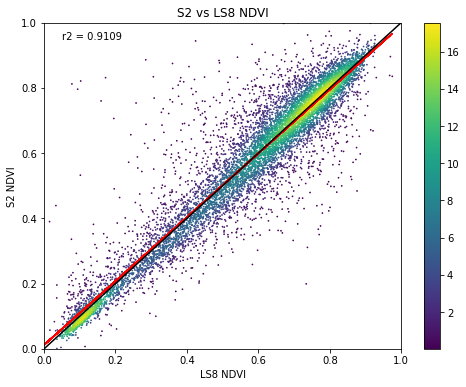

In [6]:
print(f'linear eq: y = {slope:.3f}*x + {intercept:.3f}')
print("MAE: ", round(mae, 4))
print('\n')
fig, ax = plt.subplots(1,1, sharey=True, figsize=(8,6))
plt.scatter(x, y, c=z, s=0.5)
plt.plot(x, intercept + slope * x, '-', c='red')
# plt.clim(0,30)
plt.colorbar()
plt.text(0.05,0.95,"r2 = "+str(round(r**2,4)))
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)
ax.plot([0, 1], [0, 1], 'k-')
ax.set_xlabel('LS8 NDVI')
ax.set_ylabel('S2 NDVI')
ax.set_title('S2 vs LS8 NDVI');

### Harmonization using DEA empirically derived NDVI transform coefficients

if `y = ax + b`, and we want `y==x`, then

`y-new = (y -b)/a`

In [7]:
#transform using variabkes defined above
y_dea = (y - intercept)/slope

In [8]:
#redo the inear equation and 
s, i, r, p, sd, = stats.linregress(x, y_dea)
mae = mean_absolute_error(x, y_dea)

In [9]:
# Calculate the point density
xy_dea = np.vstack([x,y_dea])
z_dea = gaussian_kde(xy_dea)(xy_dea)

MAE:  0.049




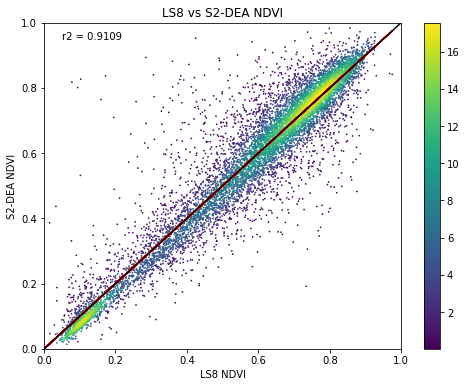

In [10]:
print("MAE: ", round(mae, 4))
print('\n')
fig, ax = plt.subplots(1,1, sharey=True, figsize=(8,6))
plt.scatter(x, y_dea, c=z, s=0.5)
plt.plot(x, i + s * x, '-', c='red')
# plt.clim(0,30)
plt.colorbar()
plt.text(0.05,0.95,"r2 = "+str(round(r**2,4)))
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)
ax.plot([0, 1], [0, 1], 'k-')
ax.set_xlabel('LS8 NDVI')
ax.set_ylabel('S2-DEA NDVI')
ax.set_title('LS8 vs S2-DEA NDVI');

### Harmonize Landsat 8 with Sentinel-2 using Chastain et. al 2019

https://www.sciencedirect.com/science/article/pii/S0034425718305212?via%3Dihub

In [11]:
# multiplying the red band with slope and adding to intercept
slope = 1.0524
intercept = -0.00151
df['red_chastain_s2']  = (df['red_s2']  - intercept) / slope

In [12]:
slope = 1.0283
intercept = -0.0021
df['nir_chastain_s2']  = (df['nir_s2']  - intercept) / slope

In [13]:
df['ndvi_chastain_s2'] = (
    (df['nir_chastain_s2']-df['red_chastain_s2'])
    /
    (df['nir_chastain_s2']+df['red_chastain_s2'])
)

In [14]:
y1=df['ndvi_chastain_s2'].values

In [15]:
s, i, r, p, sd, = stats.linregress(x, y1)
mae = mean_absolute_error(x, y1)

linear eq: y = 0.968*x + 0.025
MAE:  0.0459




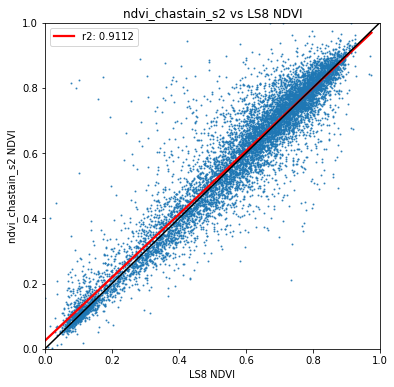

In [16]:
print(f'linear eq: y = {s:.3f}*x + {i:.3f}')
print("MAE: ", round(mae, 4))
print('\n')
fig, ax = plt.subplots(1,1, sharey=True, figsize=(6,6))

sns.regplot(x=x, y=y1, ax=ax, scatter_kws={"s": 1},
              line_kws={'label':"r2: "+str(round(r**2,4)), 'color':'red'})

# ax.hexbin(x=x, y=y, cmap='viridis', gridsize=25)
ax.legend()
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)
ax.plot([0, 1], [0, 1], 'k-')
ax.set_ylabel('ndvi_chastain_s2 NDVI')
ax.set_xlabel('LS8 NDVI')
ax.set_title('ndvi_chastain_s2 vs LS8 NDVI');

### Harmonize Landsat 8 with Sentinel-2 using Claverie et. al 2018

https://www.sciencedirect.com/science/article/pii/S0034425718304139

In [17]:
# multiplying the red band with slope and adding to intercept
slope = 0.982
intercept = 0.00094
df['red_claverie']  = (df['red_s2'] * slope) + intercept

In [18]:
# multiplying the nir band with slope and adding to intercept
slope = 1.001
intercept = -0.00029
df['nir_claverie']  = (df['nir_s2'] * slope) + intercept

In [19]:
df['ndvi_claverie_s2'] = ((df['nir_claverie']-df['red_claverie'])
                       /
                       (df['nir_claverie']+df['red_claverie'])
                      )

In [20]:
y2=df['ndvi_claverie_s2'].values

In [21]:
s, i, r, p, sd, = stats.linregress(x, y2)
mae = mean_absolute_error(x, y2)

linear eq: y = 0.970*x + 0.023
MAE:  0.046




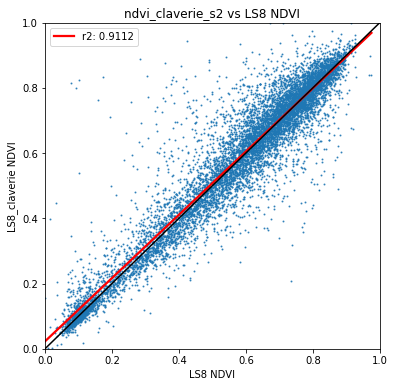

In [22]:
print(f'linear eq: y = {s:.3f}*x + {i:.3f}')
print("MAE: ", round(mae, 4))
print('\n')
fig, ax = plt.subplots(1,1, sharey=True, figsize=(6,6))

sns.regplot(x=x, y=y2, ax=ax, scatter_kws={"s": 1},
              line_kws={'label':"r2: "+str(round(r**2,4)), 'color':'red'})

# ax.hexbin(x=x, y=y, cmap='viridis', gridsize=25)
ax.legend()
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)
ax.plot([0, 1], [0, 1], 'k-')
ax.set_ylabel('LS8_claverie NDVI')
ax.set_xlabel('LS8 NDVI')
ax.set_title('ndvi_claverie_s2 vs LS8 NDVI');

## Harmonize Landsat 8 with Sentinel-2 using Australian Co-effiecent

Flood et al

In [23]:
slope = 0.9895
intercept = 0.0027
df['red_aus']  = (df['red_s2'] * slope) + intercept

In [24]:
slope = 1.0129
intercept = 0.0147
df['nir_aus']  = (df['nir_s2'] * slope) + intercept

In [25]:
df['ndvi_aus_s2'] = (
    (df['nir_aus']-df['red_aus'])
                           /
                           (df['nir_aus']+df['red_aus'])
)

In [26]:
y3=df['ndvi_aus_s2'].values

In [27]:
s, i, r, p, sd, = stats.linregress(x, y3)
mae = mean_absolute_error(x, y3)

linear eq: y = 0.968*x + 0.025
MAE:  0.0459




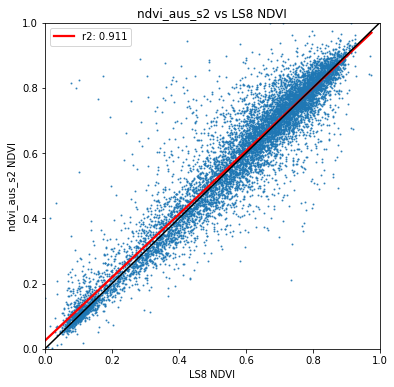

In [28]:
print(f'linear eq: y = {s:.3f}*x + {i:.3f}')
print("MAE: ", round(mae, 4))
print('\n')
fig, ax = plt.subplots(1,1, sharey=True, figsize=(6,6))

sns.regplot(x=x, y=y3, ax=ax, scatter_kws={"s": 1},
              line_kws={'label':"r2: "+str(round(r**2,3)), 'color':'red'})

# ax.hexbin(x=x, y=y, cmap='viridis', gridsize=25)
ax.legend()
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)
ax.plot([0, 1], [0, 1], 'k-')
ax.set_ylabel('ndvi_aus_s2 NDVI')
ax.set_xlabel('LS8 NDVI')
ax.set_title('ndvi_aus_s2 vs LS8 NDVI');

## Harmonize Landsat 8 with Sentinel-2 using Zhang et al

https://www.sciencedirect.com/science/article/pii/S0034425718301883#fo0005


In [29]:
# slope = 0.9566 
# intercept = 0.0185 

slope = 1.0016
intercept = 0.0016

In [30]:
df['ndvi_zhang']  = (df['NDVI_s2'] * slope) + intercept

In [31]:
y4=df['ndvi_zhang'].values
s, i, r, p, sd, = stats.linregress(x, y4)
mae = mean_absolute_error(x, y4)

linear eq: y = 0.980*x + 0.014
MAE:  0.047




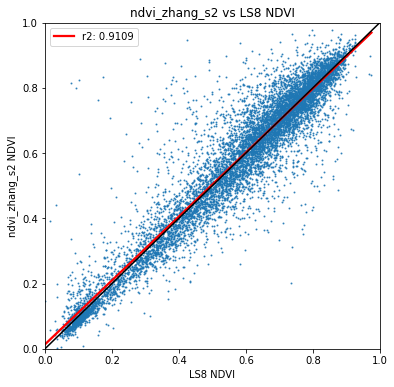

In [32]:
print(f'linear eq: y = {s:.3f}*x + {i:.3f}')
print("MAE: ", round(mae, 4))
print('\n')
fig, ax = plt.subplots(1,1, sharey=True, figsize=(6,6))

sns.regplot(x=x, y=y4, ax=ax, scatter_kws={"s": 1},
              line_kws={'label':"r2: "+str(round(r**2,4)), 'color':'red'})

# ax.hexbin(x=x, y=y, cmap='viridis', gridsize=25)
ax.legend()
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)
ax.plot([0, 1], [0, 1], 'k-')
ax.set_ylabel('ndvi_zhang_s2 NDVI')
ax.set_xlabel('LS8 NDVI')
ax.set_title('ndvi_zhang_s2 vs LS8 NDVI');